In [1]:
import os
os.chdir("../")
import numpy as np 
from utils import *
import pandas
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

In [2]:
def get_seed_and_loss(file_path):
    df = files_to_dataframe(bfs_search_and_get_files("../../worm_result"), allow_missing=True, warning=False)
#     df = df[df.model_name.str.contains("FF_1D")]
    df['seed'] = df['ham_path'].str.extract(r'seed_(\d+)').astype(int)
    df['loss'] = df['u_path'].str.extract(r'loss_([+|-]?[0-9]*\.[0-9]+|[0-9]+\.[0-9]*$)').astype(float)
    return df
df = get_seed_and_loss("../../worm_result")
df = df[df.sweeps == 4*10**6]


## Compare for different beta at L = 6

In [3]:
df.n_sites.unique()

array([ 29,  11,  73,  21,   8,   6, 100,  15,  54,  39])

In [45]:
data = np.concatenate([df_dict["mel"]['e'], df_dict["none"]['e']])
Q1 = np.percentile(data, 25)
Q3 = np.percentile(data, 75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
print(Q3, Q1)


2.013355 -0.7257452499999999


In [49]:
df_dict["mel"]

,model_name,alpha,temperature,n_sites,u_path,ham_path,sweeps,e,e_error,as,as_error,c,c_error,m,m_error,chi,chi_error,seed,loss
481,FF_1D,0.2,0.1000,8,../python/rmsKit/array/torch/FF1D_loc/s_3_r_2_...,../python/rmsKit/array/torch/FF1D_loc/s_3_r_2_...,4000000,475.306000,361.129000,-0.000166,0.000953,1.734140e+06,1.573670e+06,0.0,0.0,0.0,0.0,0,0.17387
492,FF_1D,0.2,0.2154,8,../python/rmsKit/array/torch/FF1D_loc/s_3_r_2_...,../python/rmsKit/array/torch/FF1D_loc/s_3_r_2_...,4000000,0.319463,0.020979,0.082990,0.001236,2.194420e-01,1.196280e-01,0.0,0.0,0.0,0.0,0,0.17387
485,FF_1D,0.2,0.4642,8,../python/rmsKit/array/torch/FF1D_loc/s_3_r_2_...,../python/rmsKit/array/torch/FF1D_loc/s_3_r_2_...,4000000,0.775455,0.002903,0.724603,0.001001,2.948140e-01,3.210640e-03,0.0,0.0,0.0,0.0,0,0.17387
488,FF_1D,0.2,1.0000,8,../python/rmsKit/array/torch/FF1D_loc/s_3_r_2_...,../python/rmsKit/array/torch/FF1D_loc/s_3_r_2_...,4000000,2.012790,0.003091,0.966527,0.000309,2.309860e-01,8.798630e-04,0.0,0.0,0.0,0.0,0,0.17387


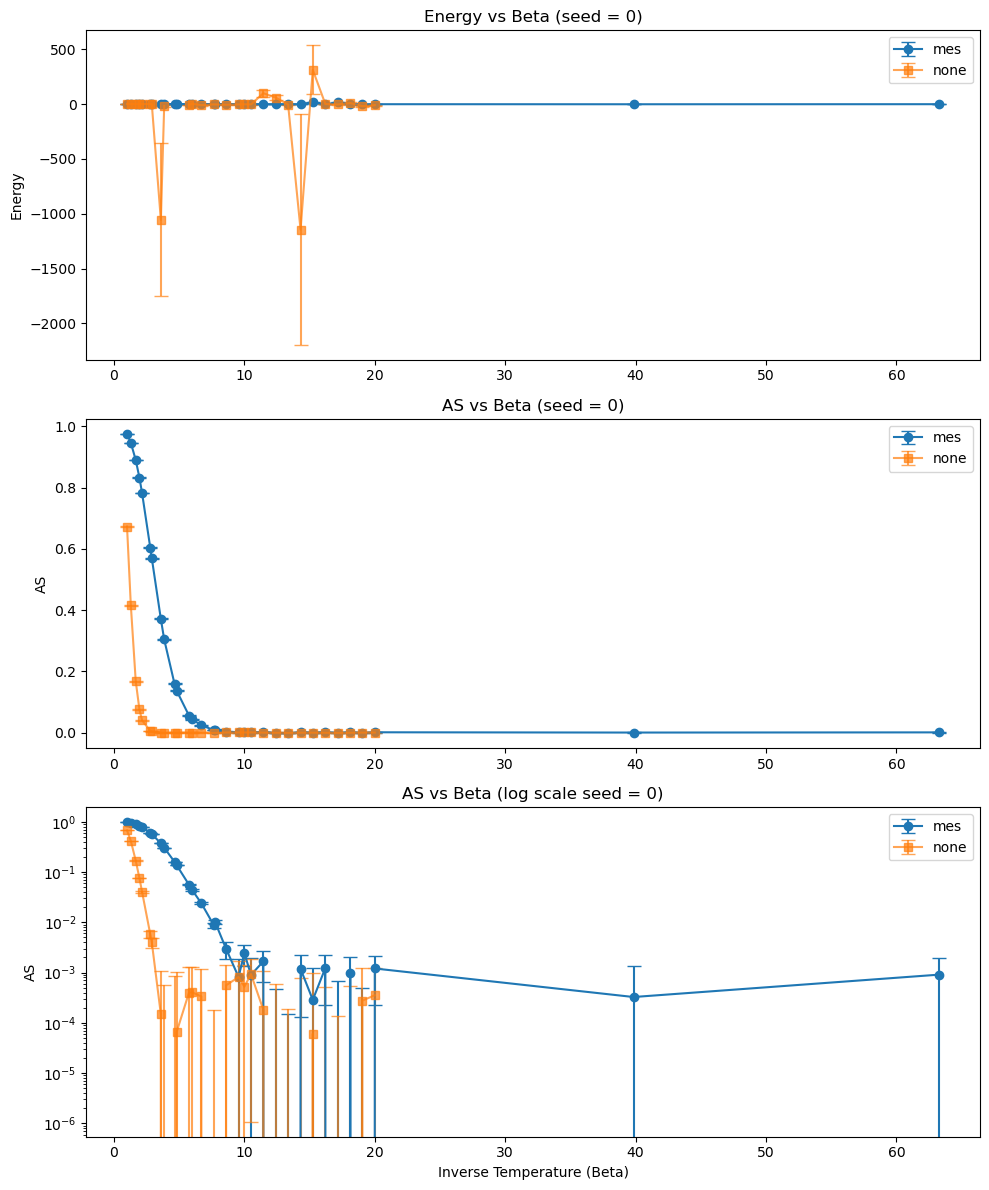

In [4]:
n = 6
df_n = df[df.n_sites == n]
seed_list = sorted(df_n.seed.unique())

for seed in [0]:
    dfs = df_n[df_n.seed == seed]
    df_dict = {}
    df_dict["mel"] = dfs[dfs.u_path.str.contains("mel")]
    df_dict["none"] = dfs[dfs.u_path == ""]

    for key, _df in df_dict.items():
        df_dict[key] = _df.loc[_df.groupby("temperature")["as"].idxmax()].sort_values(by="temperature")

    fig, ax = plt.subplots(3, figsize=(10, 12))
    # gs = gridspec.GridSpec(3, 1, height_ratios=[1, 1, 1], hspace=0.4)
    ax1 = ax[0]
    ax2 = ax[1]
    ax3 = ax[2]

    # Plotting Energy vs Inverse Temperature (Beta) in ax1
    ax1.errorbar(1/df_dict["mel"]['temperature'], df_dict["mel"]['e'], yerr=df_dict["mel"]['e_error'], fmt='o-', capsize=5, label='mes')
    ax1.errorbar(1/df_dict["none"]['temperature'], df_dict["none"]['e'], yerr=df_dict["none"]['e_error'], fmt='s-', capsize=5, label='none', alpha=0.7)
    ax1.set_title(f'Energy vs Beta (seed = {seed})')
    ax1.set_ylabel('Energy')
    ax1.legend()
#     ax1.set_ylim(-0.5, df_dict["mel"].e.iloc[-1]+0.1)

    # Plotting AS vs Inverse Temperature in ax2
    ax2.errorbar(1/df_dict["mel"]['temperature'], df_dict["mel"]['as'], yerr=df_dict["mel"]['as_error'], fmt='o-', capsize=5, label='mes')
    ax2.errorbar(1/df_dict["none"]['temperature'], df_dict["none"]['as'], yerr=df_dict["none"]['as_error'], fmt='s-', capsize=5, label='none', alpha=0.7)
    ax2.set_title(f'AS vs Beta (seed = {seed})')
    ax2.set_ylabel('AS')
    ax2.legend()

    # Plotting AS vs Inverse Temperature (Log Scale) in ax3
    ax3.errorbar(1/df_dict["mel"]['temperature'], df_dict["mel"]['as'], yerr=df_dict["mel"]['as_error'], fmt='o-', capsize=5, label='mes')
    ax3.errorbar(1/df_dict["none"]['temperature'], df_dict["none"]['as'], yerr=df_dict["none"]['as_error'], fmt='s-', capsize=5, label='none', alpha=0.7)
    ax3.set_title(f'AS vs Beta (log scale seed = {seed})')
    ax3.set_xlabel('Inverse Temperature (Beta)')
    ax3.set_ylabel('AS')
    ax3.set_yscale('log')
    ax3.legend()

    fig.tight_layout()
#     fig.show()
    fig.savefig(f"image/n_{n}_seed={seed}_mes_vs_none")
    



## Compare for different beta and different L

In [32]:
dft

,model_name,alpha,temperature,n_sites,u_path,ham_path,sweeps,e,e_error,as,as_error,c,c_error,m,m_error,chi,chi_error,seed,loss
245,FF_1D_L_6,0.2,0.0158,6,../python/rmsKit/array/torch/FF1D_loc/s_3_r_2_...,../python/rmsKit/array/torch/FF1D_loc/s_3_r_2_...,4000000,-0.802397,0.408123,0.000625,0.000957,163.592,121.109,0.0,0.0,0.0,0.0,0,0.17387
246,FF_1D_L_6,0.2,0.0158,6,../python/rmsKit/array/torch/FF1D_loc/s_3_r_2_...,../python/rmsKit/array/torch/FF1D_loc/s_3_r_2_...,4000000,-0.852408,0.292592,0.000910,0.001027,105.774,176.491,0.0,0.0,0.0,0.0,0,0.17387


number of data is not sufficient
number of data is not sufficient


/Users/keisukemurota/miniconda3/envs/torch21/lib/python3.9/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


number of data is not sufficient
number of data is not sufficient


/Users/keisukemurota/miniconda3/envs/torch21/lib/python3.9/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


number of data is not sufficient
number of data is not sufficient


/Users/keisukemurota/miniconda3/envs/torch21/lib/python3.9/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


number of data is not sufficient
number of data is not sufficient
number of data is not sufficient


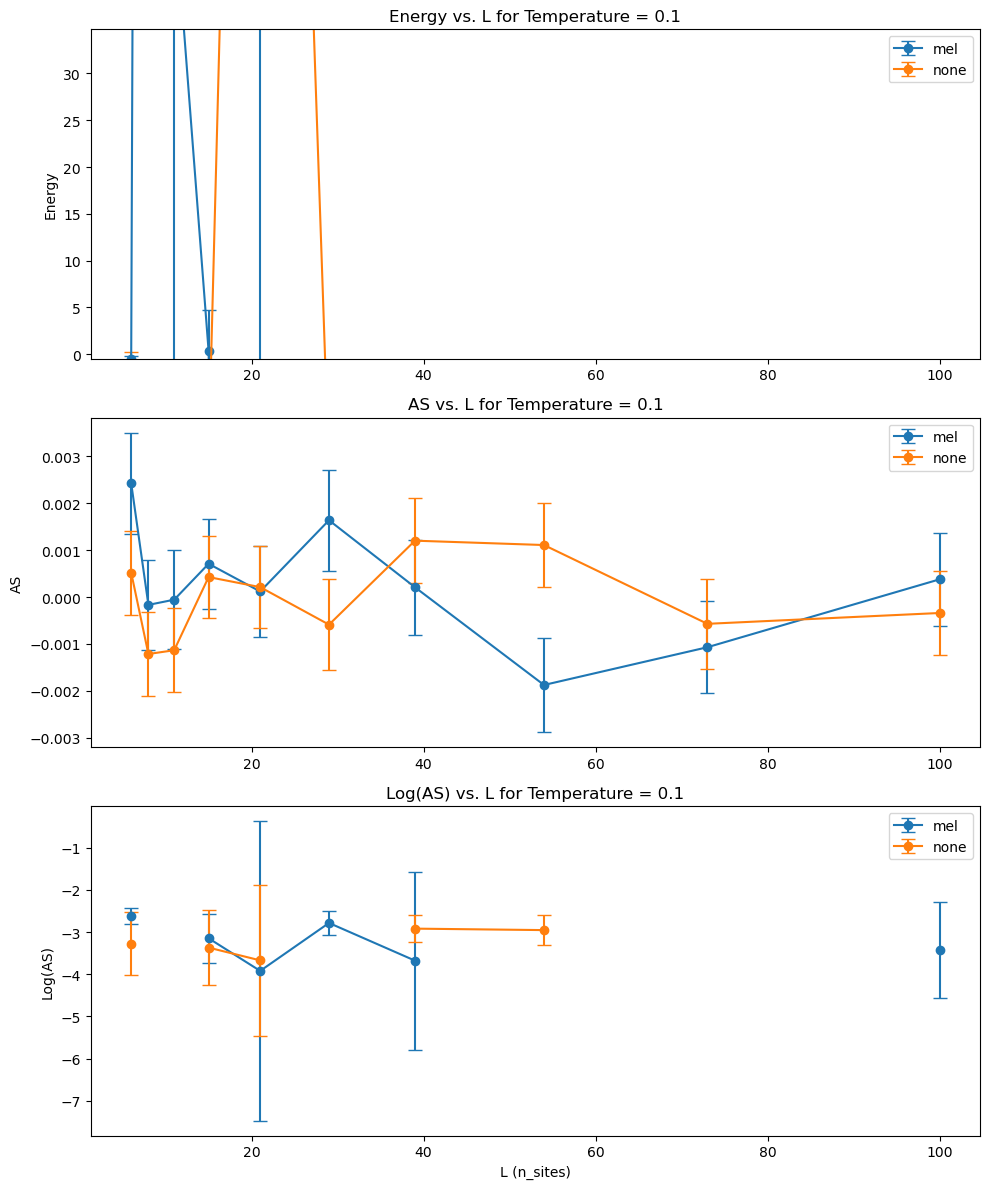

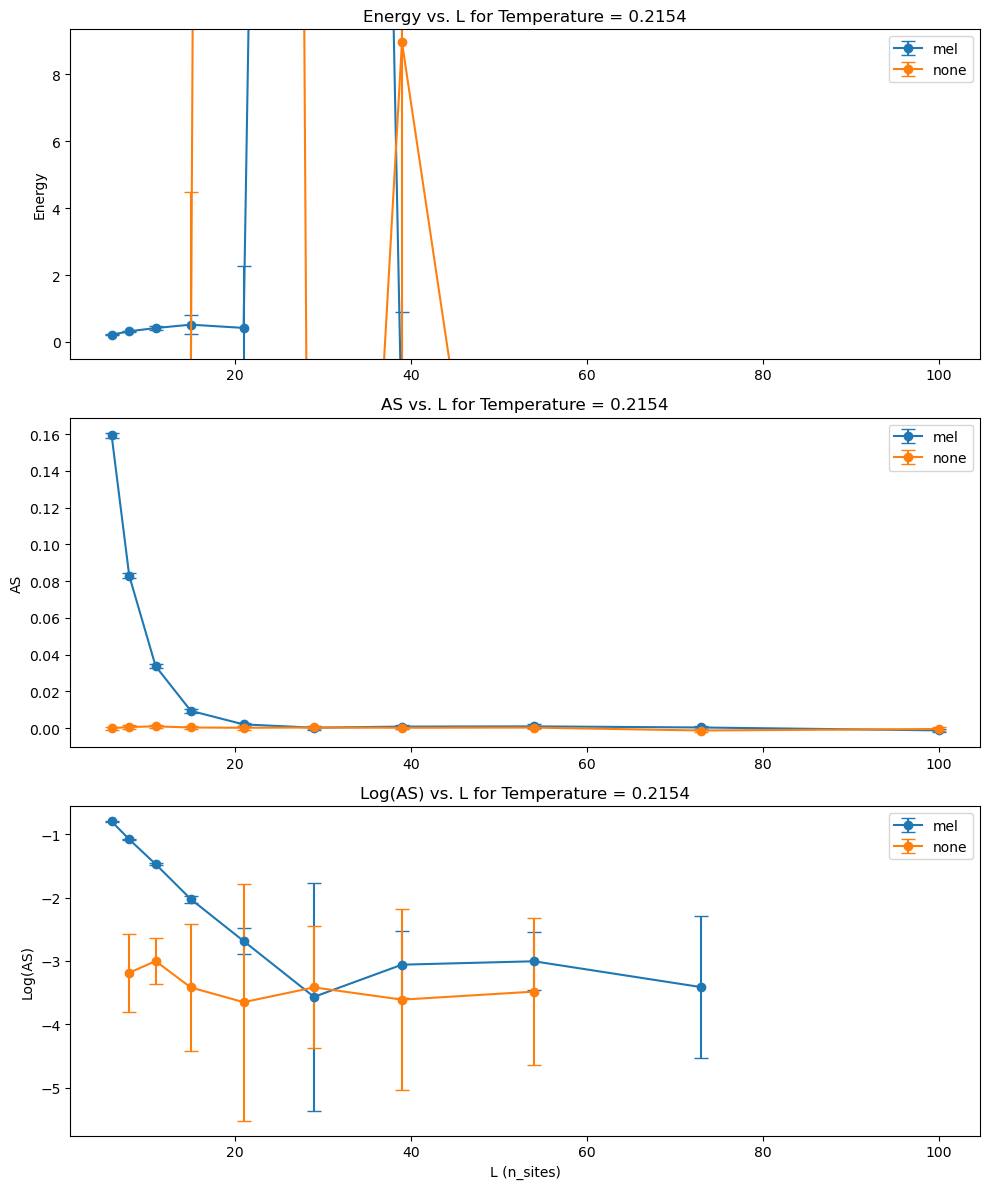

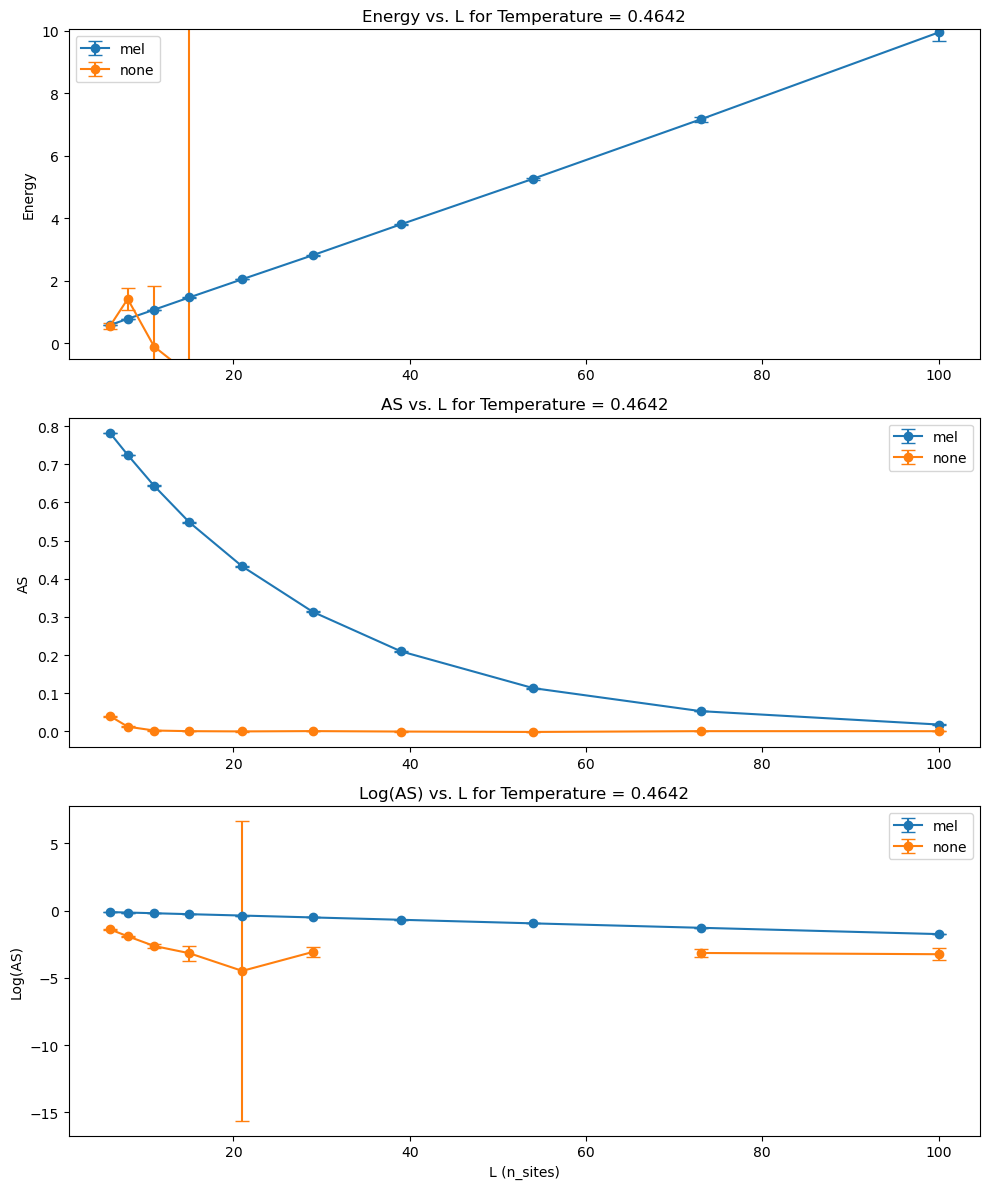

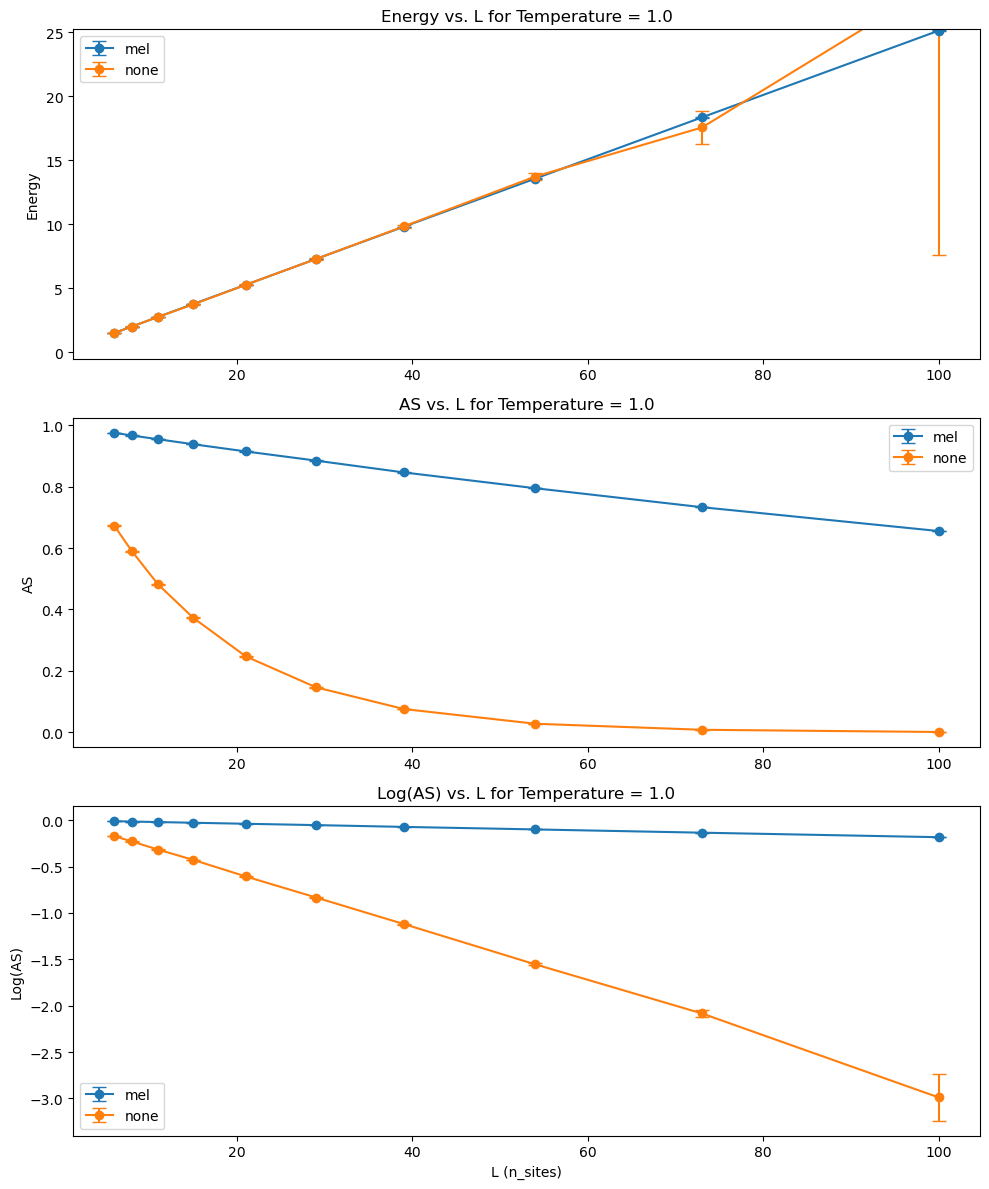

In [23]:
import matplotlib.pyplot as plt
import numpy as np

seed = 0
L_list = sorted(df.n_sites.unique())
dfs = df[df.seed == seed]
t_list = sorted(dfs.temperature.unique())

for t in t_list:
    dft = dfs[dfs.temperature == t]
    df_dict = {}
    df_dict["mel"] = dft[dft.u_path.str.contains("mel")]
    df_dict["none"] = dft[dft.u_path == ""]
    
    if (len(dft) / len(df_dict)) < 2:
        print("number of data is not sufficient")
        continue
    
    for key, _df in df_dict.items():
        df_dict[key] = _df.loc[_df.groupby("n_sites")["as"].idxmax()].sort_values(by="n_sites")

    fig, ax = plt.subplots(3, figsize=(10, 12))
    ax1 = ax[0]
    ax2 = ax[1]
    ax3 = ax[2]

    # 1. Plotting Energy vs L in ax1
    for key, _df in df_dict.items():
        ax1.errorbar(_df["n_sites"], _df["e"], yerr=_df["e_error"], label=key, marker='o', capsize=5)
    ax1.set_title(f'Energy vs. L for Temperature = {t}')
    ax1.set_ylabel('Energy')
#     ax1.set_ylim(-, 3)
    ax1.set_ylim(-0.5, np.abs(df_dict["mel"].e.iloc[-1]+0.1))
    ax1.legend()

    # 2. Plotting AS vs L in ax2
    for key, _df in df_dict.items():
        ax2.errorbar(_df["n_sites"], _df["as"], yerr=_df["as_error"], label=key, marker='o', capsize=5)
    ax2.set_title(f'AS vs. L for Temperature = {t}')
    ax2.set_ylabel('AS')
    ax2.legend()

    # 3. Plotting AS (log) vs L in ax3
    for key, _df in df_dict.items():
        as_log_error = np.abs(_df["as_error"] / (_df["as"] * np.log(10)))
        ax3.errorbar(_df["n_sites"], np.log10(_df["as"]), yerr=as_log_error, label=key, marker='o', capsize=5)
    ax3.set_title(f'Log(AS) vs. L for Temperature = {t}')
    ax3.set_xlabel('L (n_sites)')
    ax3.set_ylabel('Log(AS)')
    ax3.legend()

    fig.tight_layout()
    fig.savefig(f"image/seed={seed}_t={t}_mes_vs_none.png")
